# Рубежный контроль №1
Работа Беловой Е.О., группа ИУ5-62Б, вариант 2 (задача №1, набор данных №2)
### Задача
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Требование для студентов группы ИУ5-62Б - для произвольной колонки данных построить гистограмму.

### Загрузка данных

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
iris = load_iris()
for x in iris:
    print(x)

data
target
target_names
DESCR
feature_names
filename


In [8]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Пропусков в датасете нет.

## Корреляционный анализ

In [11]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


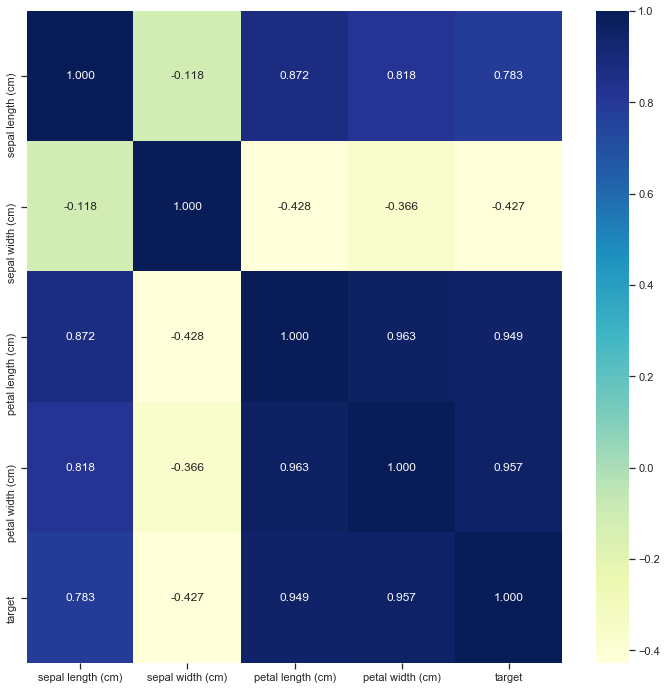

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

На основе корреляционной матрицы можно сделать следующие выводы:
1. Целевой признак наиболее сильно коррелирует с petal width (cm) и petal length (cm). Но petal width (cm) и petal length (cm) очень сильно коррелируют между собой (0.963). Поэтому из этих признаков в модели можно оставлять только один.
2. Также целефой признак коррелирует с sepal width (cm), но он сильно коррелирует и с petal width (cm), и с petal length (cm), поэтому его нельзя оставить.
3. Также можно сделать вывод, что выбирая из признаков petal width (cm) и petal length (cm), лучше выбрать petal width (cm), потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.

## Гистограмма

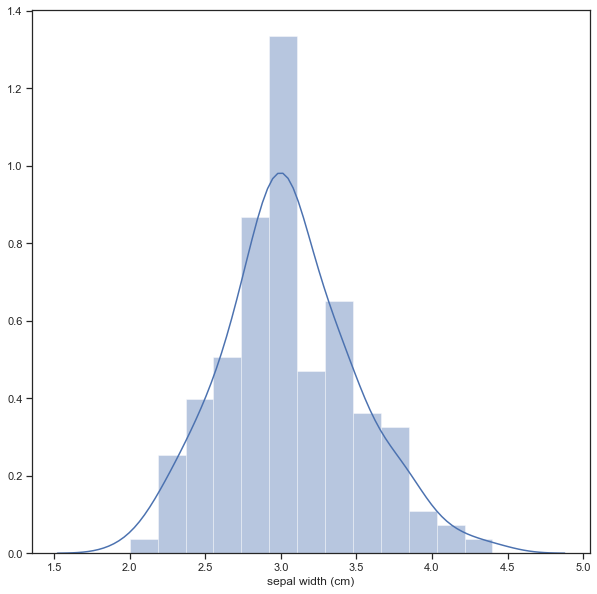

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal width (cm)'])